In [1]:
import numpy as np
N = 200
dist_1 = np.zeros(N)
dist_2 = np.zeros(N)
dist_3 = np.zeros(N)

index_1 = np.random.randint(N-10)
#index_2 = np.random.randint(590)
index_2 = index_1 + int(np.random.randint(-10,10))

index_3 = np.random.randint(N-10)

density_1 = np.random.randint(9)+1
density_2 = np.random.randint(9)+1
density_3 = np.random.randint(9)+1

dist_1[index_1] = density_1
dist_2[index_2] = density_1
dist_3[index_3] = density_1



In [2]:
from scipy.ndimage import gaussian_filter1d
dist_1 = gaussian_filter1d(dist_1, 0.1)
dist_2 = gaussian_filter1d(dist_2, 0.1)
dist_3 = gaussian_filter1d(dist_3, 0.1)

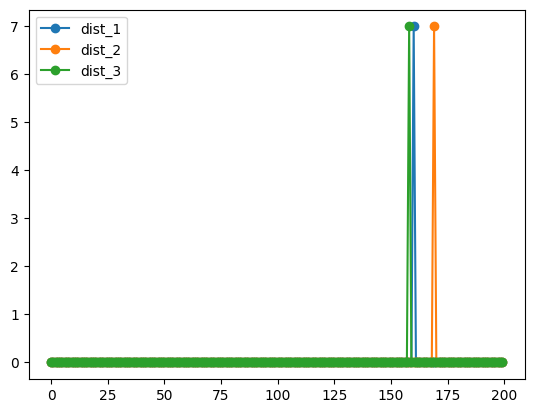

In [3]:
import matplotlib.pyplot as plt 
plt.plot(dist_1, 'o-', label= "dist_1")
plt.plot(dist_2, 'o-', label= "dist_2")
plt.plot(dist_3, 'o-', label= "dist_3")
plt.legend()
plt.show()

In [4]:
# It's not a standard ft, 
# you can change the magic_number to finite the biggest number of peaks
def ift(dist):
    magic_number = 16
    x = np.zeros(len(dist))
    coeff = magic_number*np.pi / len(x)**2
    for i in range(len(x)):
        for k in range(len(dist)):
            x[i] += dist[k] * np.cos(k * i * coeff)
    return np.abs(x) 

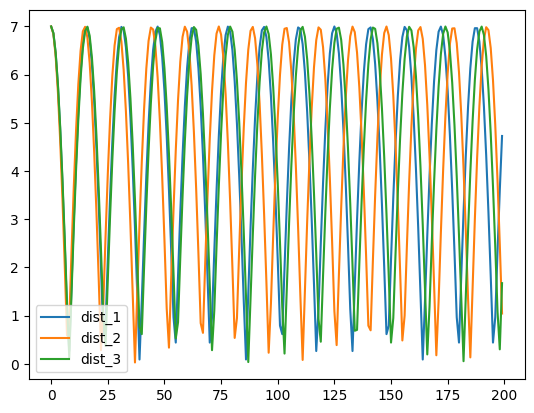

In [5]:
idist_1 = ift(dist_1)
idist_2 = ift(dist_2)
idist_3 = ift(dist_3)

plt.plot(ift(dist_1), label='dist_1')
plt.plot(ift(dist_2), label='dist_2')
plt.plot(ift(dist_3), label='dist_3')
plt.legend()

In [6]:
def similarity(x, y):
    coeff = max(np.trapezoid(x),np.trapezoid(y))
    int_mini = np.trapezoid(np.minimum(x,y)) / coeff 
    return int_mini
 
print(similarity(dist_1,dist_2)) 
print(similarity(dist_1,dist_3)) 
print(similarity(dist_1,dist_1)) 

0.0
0.0
1.0


In [7]:
print(similarity(idist_1,idist_2))
print(similarity(idist_1,idist_3))
print(similarity(idist_1,idist_1))

0.6884377745622863
0.8830748138968053
1.0


In [8]:
def JS_grad(x, y):
    coeff = max(np.trapezoid(x), np.trapezoid(y))
    x /= coeff
    y /= coeff
    x += 1e-6
    y += 1e-6
    m = (x+y)/2
    KL_xm = np.sum(x * np.log(x/m))
    KL_ym = np.sum(y * np.log(y/m))
    return (KL_xm+KL_ym) * 0.5

In [9]:
print(JS_grad(dist_1, dist_2))
print(JS_grad(dist_1, dist_3))
print(JS_grad(dist_1, dist_1))

print(JS_grad(idist_1, idist_2))
print(JS_grad(idist_1, idist_3))
print(JS_grad(idist_1, idist_1))


0.6931337513422484
0.39607123576166586
0.0
0.09339352705490847
0.3438009632358873
0.0
